# Introduction

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

**Variables**

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


# Part 1 : Analyzing the wildfire activities in Australia

## Outlining the data

In [1]:
 # Importing the required libraries.
from io import StringIO
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = StringIO(requests.get(URL).text)
df = pd.read_csv(resp)


In [2]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


In [4]:
# Lets fix the `Date` column
df["month"] = pd.to_datetime(df["Date"]).dt.month
df["year"] = pd.to_datetime(df["Date"]).dt.year

## Univariate Analysis

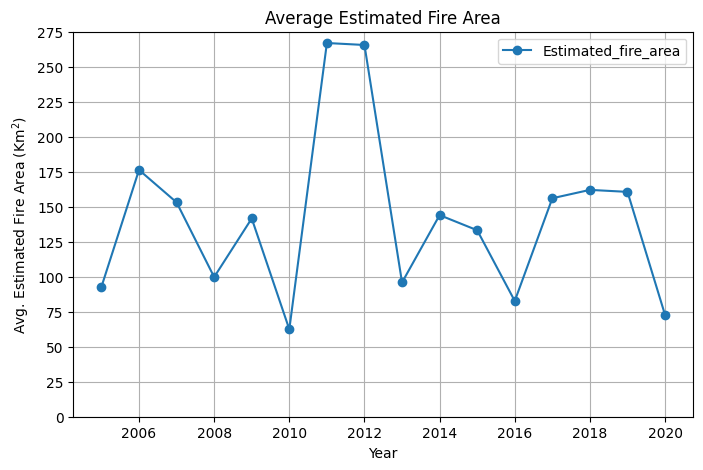

In [5]:
# 1. Let's try to understand the change in average estimated fire area over time
avg_fire_area = df.groupby("year")["Estimated_fire_area"].mean().reset_index()

# fix the y-limit; start from 0
step = 25
y_limit = (0,max(avg_fire_area["Estimated_fire_area"]))
y_ticks = np.arange(y_limit[0], y_limit[1] + (step+1), step)  # Step size of 1

# Creating the axis
ax = plt.gca()

# Creating the plot
avg_fire_area.plot(x="year",y="Estimated_fire_area",kind="line",figsize=(8,5),
        title="Average Estimated Fire Area",grid=True,legend=True,
        ylabel=r"Avg. Estimated Fire Area (Km$^2$)",xlabel="Year",marker="o",ax=ax)

# Setting the axis ticks.
ax.set_ylim(y_limit)
ax.set_yticks(y_ticks)

# Display the plot.
plt.show()
plt.close()



We can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

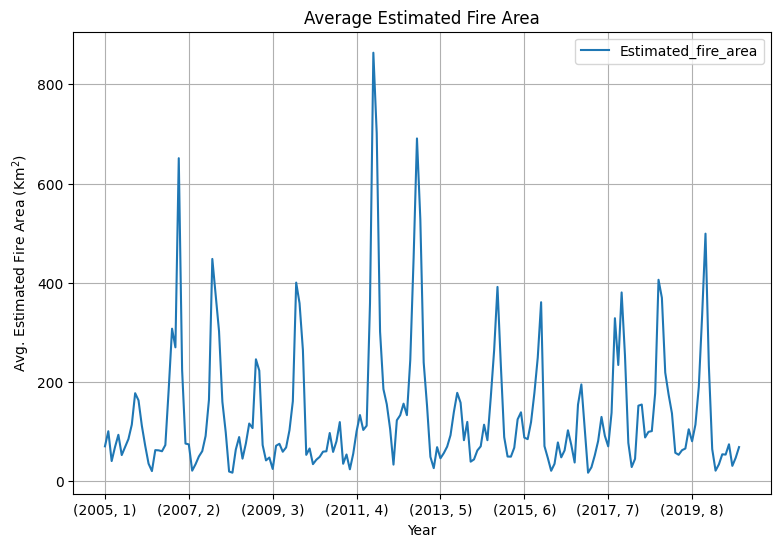

In [6]:
# Plotting the estimated fire area for year grouped together with month.
# 1. Let's try to understand the change in average estimated fire area over time
avg_fire_area = df.groupby(["year","month"])["Estimated_fire_area"].mean()


# Creating the axis
ax = plt.gca()

# Creating the plot
avg_fire_area.plot(x=avg_fire_area.index,y=avg_fire_area.values,kind="line",figsize=(9,6),
        title="Average Estimated Fire Area",grid=True,legend=True,
        ylabel=r"Avg. Estimated Fire Area (Km$^2$)",xlabel="Year",ax=ax)

# Display the plot.
plt.show()
plt.close()



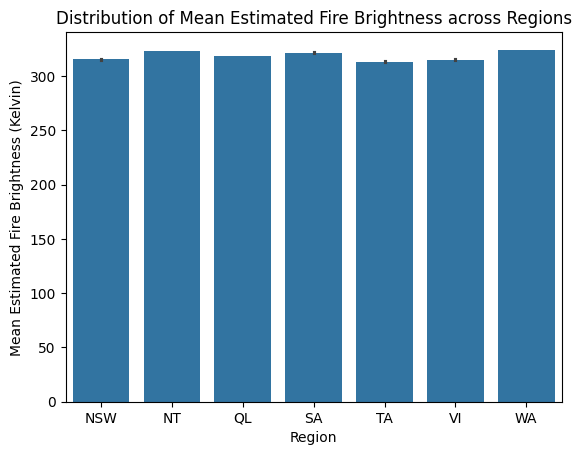

In [7]:
# Let's have an insight on the distribution of mean estimated fire brightness across the regions
plt.Figure(figsize=(9,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
# Display the plot
plt.show()
plt.close()

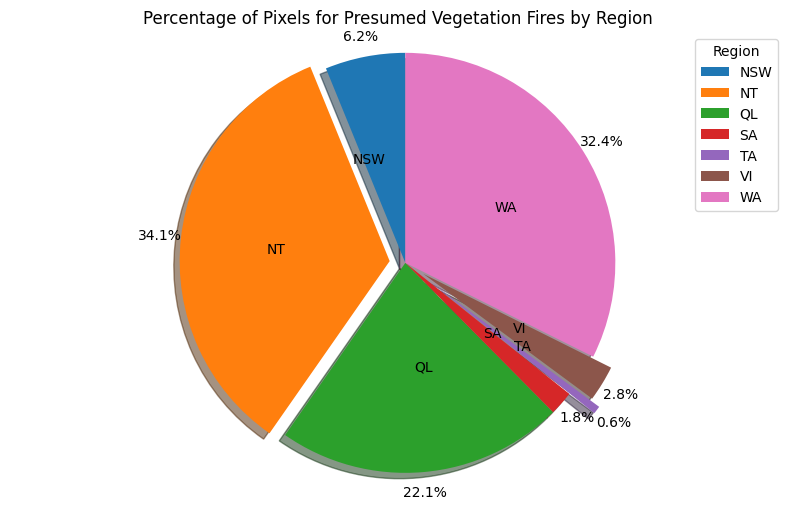

In [8]:
# Let's find the portion of count of pixels for presumed vegetation fires vary across regions.

# Proportion of count per region
region_count = df.groupby("Region")["Count"].sum()
explode = (0,0.075,0,0,0.15,0.1,0)
labels = region_count.index

# Creating the figure
plt.subplots(figsize=(10,6))
plt.pie(x=region_count.values,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90,pctdistance=1.1,labeldistance=0.5,explode=explode)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend(title="Region")

# Display the figure
plt.show()
plt.close()

## Multivariate Analysis

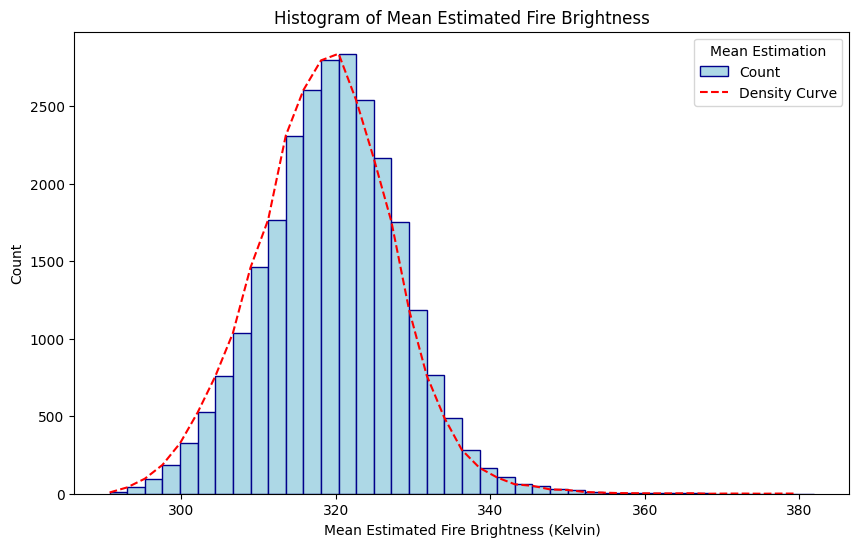

In [9]:
# Let's try to develop a histogram of the mean estimated fire brightness
h,bin_edges = np.histogram(df["Mean_estimated_fire_brightness"],bins=int(np.sqrt(len(df))/4))

# Creating the figure
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df["Mean_estimated_fire_brightness"],bins=bin_edges,edgecolor="darkblue",color="lightblue",label="Count")
ax.plot(bin_edges[:-1],h,"r--",label="Density Curve")

# Adding the details
plt.title("Histogram of Mean Estimated Fire Brightness")
plt.legend(title="Mean Estimation")
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')


# Displaying the figure
plt.show()
plt.close()

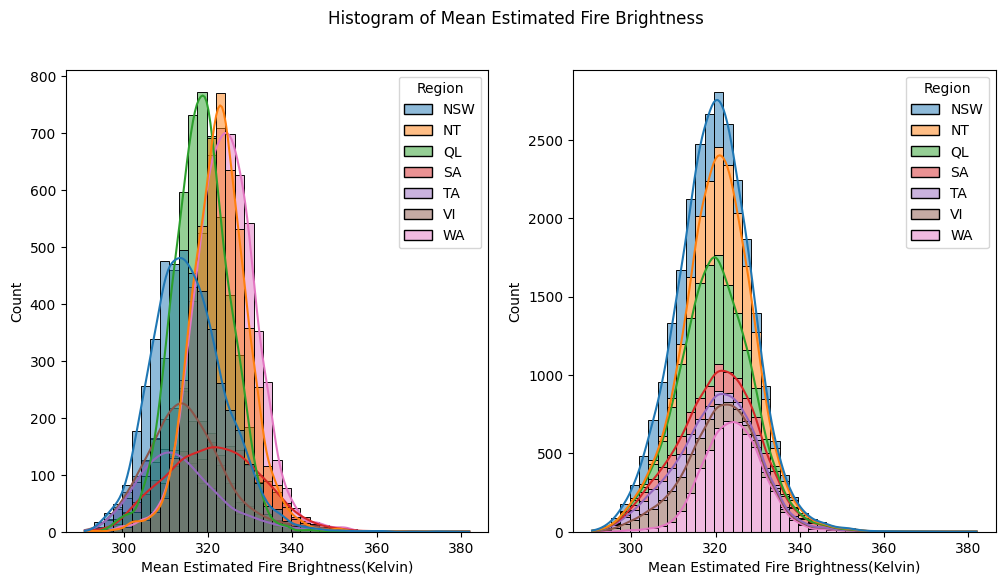

In [10]:
# Let's understand the distribution of estimated fire brightness across regions
fig,ax = plt.subplots(1,2,figsize=(12,6))

# Creating the figure
bin_width = (max(df["Mean_estimated_fire_brightness"]) - min(df["Mean_estimated_fire_brightness"])) / len(bin_edges)
sns.histplot(data=df,x="Mean_estimated_fire_brightness",hue="Region",stat="count",
             bins=bin_edges,binwidth=bin_width,ax=ax[0],kde=True,legend=True)
sns.histplot(data=df,x="Mean_estimated_fire_brightness",hue="Region",stat="count",multiple="stack",
             bins=bin_edges,binwidth=bin_width,ax=ax[1],kde=True,legend=True)

# Adding the details
plt.suptitle("Histogram of Mean Estimated Fire Brightness")
ax[0].set_xlabel("Mean Estimated Fire Brightness(Kelvin)")
ax[1].set_xlabel("Mean Estimated Fire Brightness(Kelvin)")
ax[0].set_ylabel("Count")
ax[1].set_ylabel("Count")

# Displaying the figure
plt.show()
plt.close()


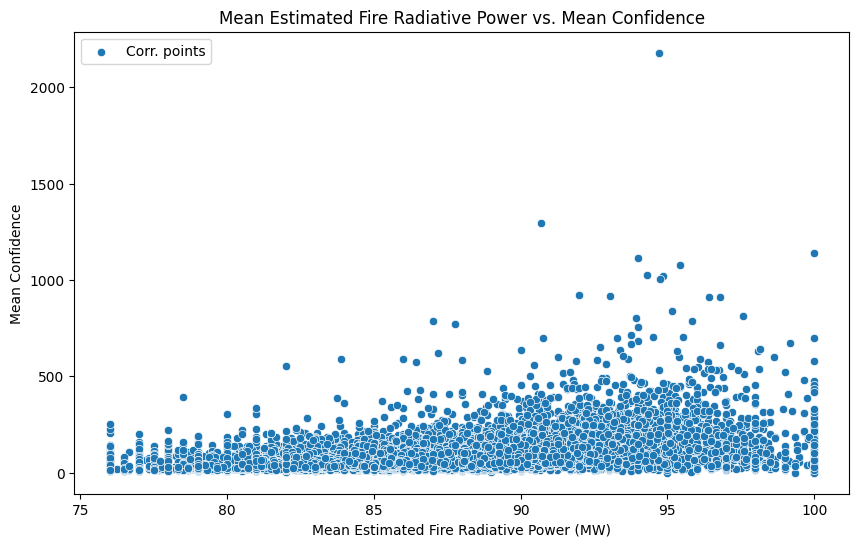

In [11]:
# Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level
fig,ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power',label="Corr. points")
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.legend(loc="upper left")
plt.show()
plt.close()

## Geospacial Analysis

#### Creating a map using folium with coordinates to Australia already provided.

In [12]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [13]:
# Let's mark these seven regions on the Map of Australia using Folium
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

Part 2 is dash board interactivity. You can take a look at the `"./wildfire_analysis_dashboard.py"` file and run it for to see the dashboard.